In [23]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

- *Name :* *Smruti Sonekar*
- *Branch :* *TY CSE DS*
- *UID :* *2021700064*
- *EXP NO :* *7*
- *Topic :* *Implement Random Forest Algorithm*

In [24]:
df1=pd.DataFrame(pd.read_csv("./files/diabetes2.csv"))
df1.sample(5)

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
113,4,76,62,0,0,34.0,0.391,25,0
85,2,110,74,29,125,32.4,0.698,27,0
310,6,80,66,30,0,26.2,0.313,41,0
390,1,100,66,29,196,32.0,0.444,42,0
248,9,124,70,33,402,35.4,0.282,34,0


*Problem Statement:*
- **Diabetes is a chronic disease that occurs when the pancreas does not produce enough insulin or when the body cannot effectively use the insulin it produces. It is a significant health issue globally, affecting millions of people. Early detection and management of diabetes are crucial for preventing complications and improving health outcomes.**

- **You are provided with a dataset containing various health metrics and indicators for a group of individuals, including information about whether each person has diabetes or not. Your task is to build a predictive model that can accurately classify individuals as either diabetic or non-diabetic based on their health attributes.**

In [25]:
df1.dtypes

Pregnancies                   int64
Glucose                       int64
BloodPressure                 int64
SkinThickness                 int64
Insulin                       int64
BMI                         float64
DiabetesPedigreeFunction    float64
Age                           int64
Outcome                       int64
dtype: object

In [26]:
X1=df1[['Age','BloodPressure','Insulin','Glucose','BMI']]
y1=df1['Outcome']

Random Forest is a popular machine learning algorithm that belongs to the supervised learning technique. It can be used for both Classification and Regression problems in ML. It is based on the concept of ensemble learning, which is a process of combining multiple classifiers to solve a complex problem and to improve the performance of the model.

In [27]:
#Fitting Decision Tree classifier to the training set  
from sklearn.ensemble import RandomForestClassifier  
from sklearn.model_selection import train_test_split

from sklearn.metrics import accuracy_score

In [28]:
X_train1, X_test1, y_train1, y_test1 = train_test_split(X1, y1, test_size=0.3, random_state=42)

In [29]:
X_train1.shape,X_test1.shape

((537, 5), (231, 5))

Ensemble Learning: Random Forest is an ensemble learning method, meaning it combines the predictions of multiple individual models to improve overall performance. In this case, the individual models are decision trees.

Decision Trees: A decision tree is a flowchart-like structure where each internal node represents a "test" on an attribute, each branch represents the outcome of the test, and each leaf node represents a class label (in classification) or a numerical value (in regression). Decision trees learn from data to approximate a target function by partitioning the feature space into regions and assigning a label to each region.

Randomization: The key concept behind Random Forest is the introduction of randomness during the tree-building process. This randomness is twofold:

Random Selection of Features: At each node of each decision tree, a random subset of features is considered for splitting. This helps in decorrelating the trees and prevents one feature from dominating the decision process.
Bootstrap Aggregating (Bagging): Each tree in the forest is built on a bootstrap sample (randomly sampled with replacement) from the original dataset. This introduces diversity in the training data for each tree.
Voting Scheme: When it comes to making predictions, Random Forest aggregates the predictions from all the trees in the forest. For classification tasks, it uses a majority voting scheme, where the class that receives the most votes among all the trees is chosen as the final prediction. For regression tasks, it takes the average of all the tree predictions.

In [30]:
classifier=RandomForestClassifier(n_estimators=12,criterion="entropy")

RandomForestClassifier: This is a class provided by scikit-learn (sklearn) library for building Random Forest classifiers.

n_estimators=10: This parameter specifies the number of decision trees to be used in the Random Forest. In this case, it's set to 10, meaning the Random Forest will consist of 10 decision trees. Increasing the number of estimators typically improves the performance of the Random Forest, but it also increases computation time.

criterion="entropy": This parameter specifies the criterion used for splitting nodes in each decision tree. In this case, "entropy" is used. Entropy is a measure of impurity in a set of data. The decision tree algorithm (and hence the Random Forest) uses this criterion to make decisions about how to split the data at each node. Other common options for the criterion parameter include "gini" and "entropy".

In [31]:
classifier.fit(X_train1,y_train1)

RandomForestClassifier(criterion='entropy', n_estimators=12)

In [32]:
# Make predictions on the testing data
y_pred = classifier.predict(X_test1)

In [33]:
results = pd.DataFrame({'Actual': y_test1, 'Predicted': y_pred})
results.head(10)

,Actual,Predicted
668,0,1
324,0,0
624,0,0
690,0,0
473,0,0
204,0,0
97,0,0
336,0,1
568,0,0
148,0,1


In [34]:
correctly_classified = [1 if actual == predicted else 0 for actual, predicted in zip(results['Actual'], results['Predicted'])]

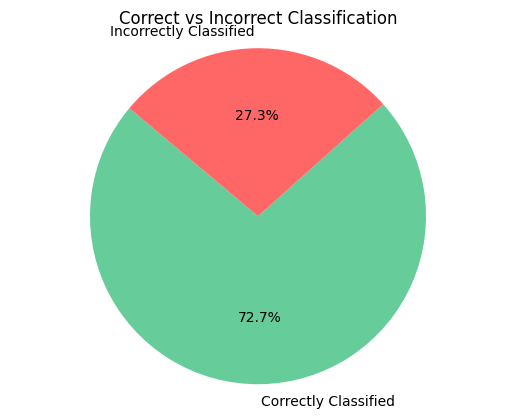

In [35]:
# Count number of correctly classified instances
num_correct = sum(correctly_classified)

# Count number of incorrectly classified instances (if needed)
num_incorrect = len(correctly_classified) - num_correct

# Create pie chart
labels = ['Correctly Classified', 'Incorrectly Classified']
sizes = [num_correct, num_incorrect]
colors = ['#66CC99', '#FF6666']  # Green for correctly classified, Red for incorrectly classified

plt.pie(sizes, labels=labels, colors=colors, autopct='%1.1f%%', startangle=140)
plt.axis('equal')  # Equal aspect ratio ensures that pie is drawn as a circle
plt.title('Correct vs Incorrect Classification')
plt.show()

In [36]:
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, confusion_matrix

In [37]:
accuracy = accuracy_score(y_test1, y_pred)
precision = precision_score(y_test1, y_pred, average='weighted')
recall = recall_score(y_test1, y_pred, average='weighted')
f1 = f1_score(y_test1, y_pred, average='weighted')
conf_matrix = confusion_matrix(y_test1, y_pred)

# Print the RANDOM FOREST evaluation metrics
print("Accuracy:", accuracy)
print("Precision:", precision)
print("Recall:", recall)
print("F1 Score:", f1)
print("Confusion Matrix:\n", conf_matrix)

Accuracy: 0.7272727272727273
Precision: 0.7236208236208236
Recall: 0.7272727272727273
F1 Score: 0.7250948064229562
Confusion Matrix:
 [[122  29]
 [ 34  46]]


In [38]:
# Make predictions on training and testing data
y_train_pred = classifier.predict(X_train1)
y_test_pred = classifier.predict(X_test1)


In [39]:
# Calculate accuracy on training and testing data
train_accuracy = accuracy_score(y_train1, y_train_pred)
test_accuracy = accuracy_score(y_test1, y_test_pred)

print("Training Accuracy:", train_accuracy)
print("Testing Accuracy:", test_accuracy)


Training Accuracy: 0.9869646182495344
Testing Accuracy: 0.7272727272727273


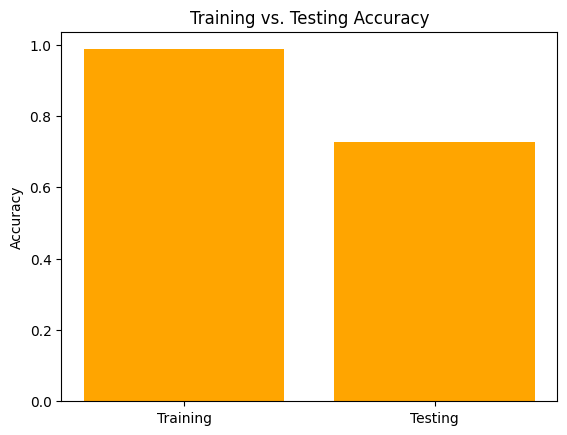

In [40]:
# Plotting
plt.bar(['Training', 'Testing'], [train_accuracy, test_accuracy],color="orange")
plt.ylabel('Accuracy')
plt.title('Training vs. Testing Accuracy')
plt.show()

**DIFFERENCE BETWEEN DECISION TREE AND RANDOM FOREST**
- Model Type:

    - Decision Tree: Represents a single tree structure, where each node represents a decision based on a feature.
    - Random Forests: Composed of multiple decision trees, forming an ensemble model.
- Overfitting:

    - Decision Tree: Prone to overfitting, especially with deep trees, as it tries to capture noise or outliers in the data.
    - Random Forests: Mitigates overfitting by aggregating the predictions of multiple trees, resulting in a more robust model.
- Construction Approach:

    - Decision Tree: Constructs the tree by recursively splitting the dataset based on the feature values to maximize information gain or minimize impurity.
    - Random Forests: Builds each tree independently using random subsets of the training data and features, adding randomness to the construction process.
- Prediction Strategy:

    - Decision Tree: Makes predictions based on the rules learned during training, following a path from the root node to a leaf node.
    - Random Forests: Aggregates predictions from multiple trees through averaging or voting, providing more stable and accurate predictions.
- Bias-Variance Tradeoff:

    - Decision Tree: Typically exhibits high variance due to its susceptibility to overfitting, resulting in less stable predictions.
    - Random Forests: Reduces variance by averaging predictions from multiple trees, leading to improved generalization performance and more robust predictions.

**Evaluation of Machine Learning Algorithms for Diabetic Patient Classification.We evaluated Logistic Regression, K-Nearest Neighbors (KNN), Decision Tree, and Random Forest algorithms for classifying whether patients are diabetic or not.**

In [41]:
import matplotlib.pyplot as plt
from PIL import Image

In [42]:
logistic_regression_image = Image.open('./files/logistic.png')
knn_image = Image.open('./files/knn.png')
decision_tree_image = Image.open('./files/decision tree.png')
random_forest_image = Image.open('./files/random forest.png')

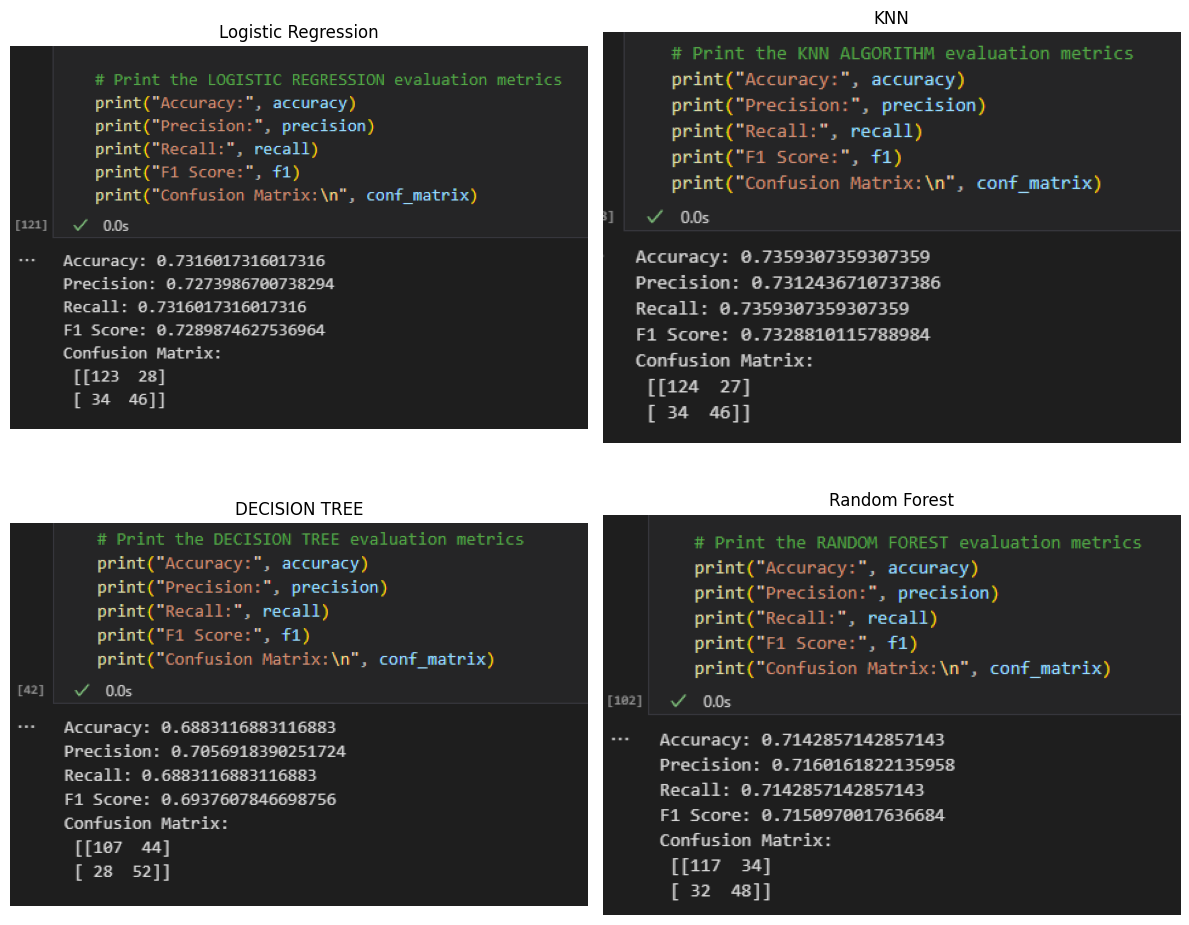

In [43]:
fig,ax=plt.subplots(2,2,figsize=(12,10))

# Display images in subplots
ax[0, 0].imshow(logistic_regression_image)
ax[0, 0].set_title('Logistic Regression')
ax[0, 0].axis('off')

# Display images in subplots
ax[0, 1].imshow(knn_image)
ax[0, 1].set_title('KNN')
ax[0, 1].axis('off')

# Display images in subplots
ax[1, 0].imshow(decision_tree_image)
ax[1, 0].set_title('DECISION TREE')
ax[1, 0].axis('off')

# Display images in subplots
ax[1, 1].imshow(random_forest_image )
ax[1, 1].set_title('Random Forest')
ax[1, 1].axis('off')

# Adjust layout
plt.tight_layout()

# Show the comparison chart
plt.show()


- **True Positives (TP)**: These occur when we correctly predict that a patient has diabetes, and the patient actually has diabetes.
 
- **True Negatives (TN)**: These occur when we correctly predict that a patient does not have diabetes, and the patient actually does not have diabetes.
 
- **False Positives (FP)**: These occur when we incorrectly predict that a patient has diabetes, but the patient actually does not have diabetes. This type of  error is also known as a Type I error.
 
- **False Negatives (FN)**: These occur when we incorrectly predict that a patient does not have diabetes, but the patient actually has diabetes. This is a significant error, also known as a Type II error.

In [44]:
#ERROR RATE OF ALL ALGORITHMS
#1 LR
T1=231
FP_lr=28
FN_lr=34
a1=(FP_lr+FN_lr)/T1
print("Error Rate of logistic:", a1)

T1=231
FP_lr=27
FN_lr=34
a2=(FP_lr+FN_lr)/T1
print("Error Rate of knn:", a2)


T1=231
FP_lr=44
FN_lr=28
a3=(FP_lr+FN_lr)/T1
print("Error Rate of decision tree:", a3)

T1=231
FP_lr=34
FN_lr=32
a4=(FP_lr+FN_lr)/T1
print("Error Rate of random forest:", a4)


Error Rate of logistic: 0.2683982683982684
Error Rate of knn: 0.26406926406926406
Error Rate of decision tree: 0.3116883116883117
Error Rate of random forest: 0.2857142857142857


CONCLUSION:
*Based on the comparison chart and error rates, the K-Nearest Neighbors (KNN) algorithm emerges as the most suitable model for predicting whether a patient is diabetic or not. With an error rate of 0.2640, KNN outperforms other algorithms in minimizing misclassifications. Furthermore, KNN exhibits the highest F1 score among all models evaluated. Conversely, the decision tree algorithm demonstrates the highest error rate, indicating its comparatively poorer performance in this context.*